In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy . spatial . distance import euclidean , cityblock
from scipy . spatial . distance import minkowski , cosine

In [2]:
from google.colab import files

uploaded = files.upload()

Saving k_means_data.csv to k_means_data.csv
Saving penguins.csv to penguins.csv
Saving PersonalData.csv to PersonalData.csv


## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [9]:
df = pd.read_csv("PersonalData.csv")
df

,Unnamed: 0,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
0,A,190,88,3,3.5,7,6,1,25,Tak
1,B,172,70,12,4.3,5,1,4,12,Nie


In [13]:
numerical_df = df.drop(columns=['Ubezp.', 'Unnamed: 0'])
A = numerical_df.loc[0].values
B = numerical_df.loc[1].values

d_euc = euclidean ( A , B )
print(d_euc)

30.604574821421714


In [15]:
numerical_df_rescaled = numerical_df.copy()
numerical_df_rescaled['Zarobki (tys.)'] = numerical_df_rescaled['Zarobki (tys.)'] * 1000
A_rescaled = numerical_df_rescaled.loc[0].values
B_rescaled = numerical_df_rescaled.loc[1].values

euclidean_distance_rescaled = euclidean(A_rescaled, B_rescaled)
print(euclidean_distance_rescaled)

800.5847862656397


In [19]:
std_dev = numerical_df.std()
df_standardized = numerical_df / std_dev

A_standardized = df_standardized.loc[0].values
B_standardized = df_standardized.loc[1].values

eds = euclidean(A_standardized, B_standardized)
print(eds)

4.0


In [18]:
minkowski_distance = minkowski(A, B, p=3)
cityblock_distance = cityblock(A, B)

print(f"Minkowski : {minkowski_distance}")
print(f"Manhattan : {cityblock_distance}")

Minkowski : 24.524624416199366
Manhattan : 68.8


## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [23]:
def lcs_length(s1, s2):
    m = len(s1)
    n = len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = 1 + dp[i - 1][j - 1]
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]

def get_D_x_y(x, y):
    len_x = len(x)
    len_y = len(y)
    lcs = lcs_length(x, y)
    return len_x + len_y - 2 * lcs


In [24]:
x = "abcde"
y = "bcdxye"
print(get_D_x_y(x, y)) # Oczekiwany wynik 3

X = "AGGTAB"
Y = "GXTXAYB"
print(get_D_x_y(X, Y)) # Oczekiwany wynik 5

3
5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"

films = [film1, film2, film3]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(films)

print(X.toarray())

[[1 1 0 0 0 0 0 1 1 0 1 0 0]
 [1 1 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 1 1]]


In [27]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_matrix = cosine_similarity(X)

print("Macierz podobieństwa cosinusowego:")
print(cosine_sim_matrix)

Macierz podobieństwa cosinusowego:
[[1.  0.4 0. ]
 [0.4 1.  0. ]
 [0.  0.  1. ]]


film 1 i 2 są podobne

In [31]:
film4 = "rakieta mars astronauta czerwona planeta"

all_films = films + [film4]

vectorizer_all = CountVectorizer()
X_all = vectorizer_all.fit_transform(all_films)

print("\nMacierz podobieństwa cosinusowego:")
print(cosine_similarity(X_all))



Macierz podobieństwa cosinusowego:
[[1.  0.4 0.  0.4]
 [0.4 1.  0.  0.4]
 [0.  0.  1.  0. ]
 [0.4 0.4 0.  1. ]]


film 4 jest podobny do 1 i 2

## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

In [32]:
df = pd.read_csv("k_means_data.csv")
df.head()

,# X1,X2
0,2.131415,1.138857
1,2.161723,0.656595
2,1.062696,5.176351
3,1.807096,0.449191
4,2.269087,1.321608


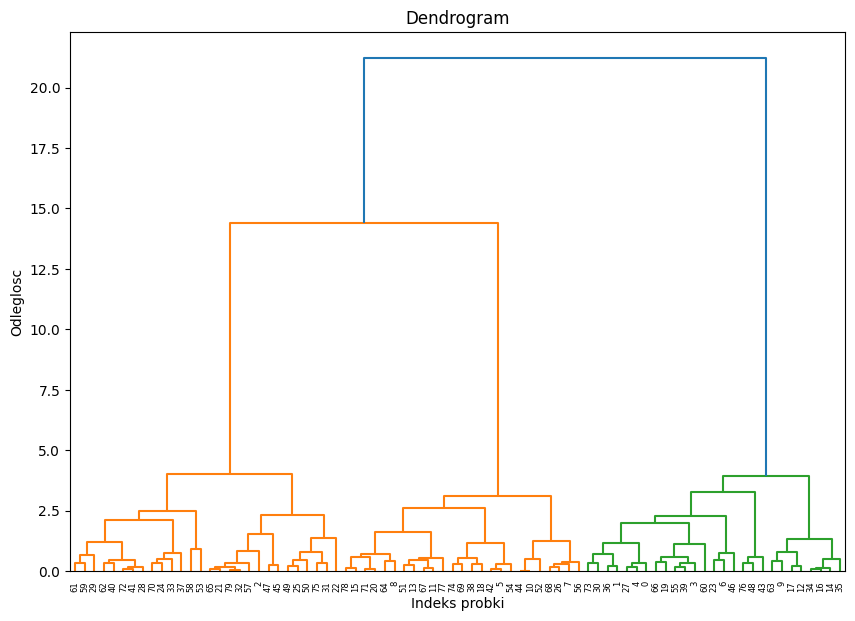

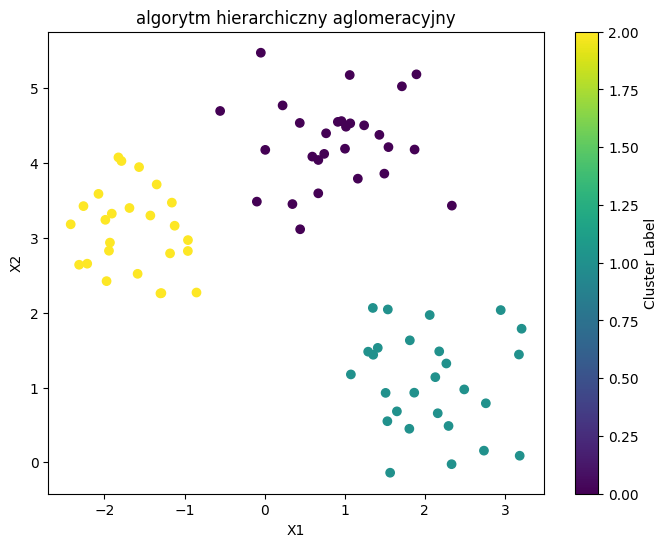

In [42]:
X_data = df[['# X1', 'X2']].values

# Obliczenie macierzy polaczen
linked = linkage(X_data, method='ward')

# Wizualizacja dendrogramu
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Indeks probki')
plt.ylabel('Odleglosc')
plt.show()

# Przypisanie do klastrow (dla k=3) - based on visual inspection of dendrogram
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels_hierarchical = agglomerative.fit_predict(X_data)


# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_data[:, 0], X_data[:, 1], c=cluster_labels_hierarchical, cmap='viridis', marker='o')
plt.title('algorytm hierarchiczny aglomeracyjny')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Cluster Label')
plt.show()

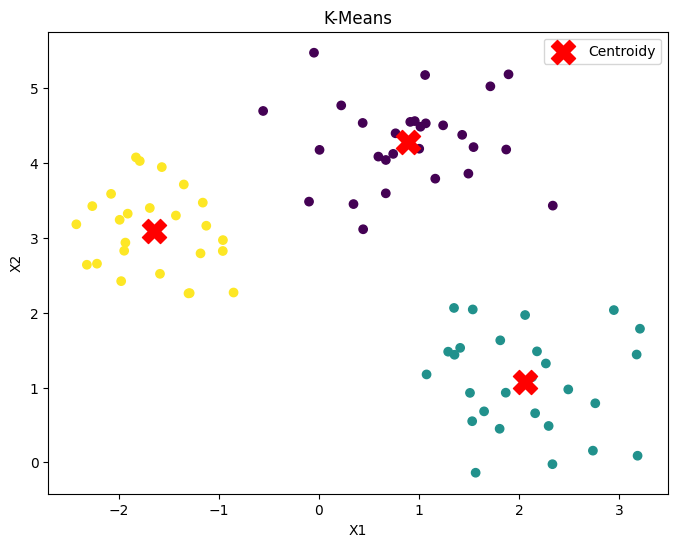

In [47]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_data)
    wcss.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
cluster_labels_kmeans = kmeans.fit_predict(X_data)

plt.figure(figsize=(8, 6))
plt.scatter(X_data[:, 0], X_data[:, 1], c=cluster_labels_kmeans, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroidy')
plt.title('K-Means')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

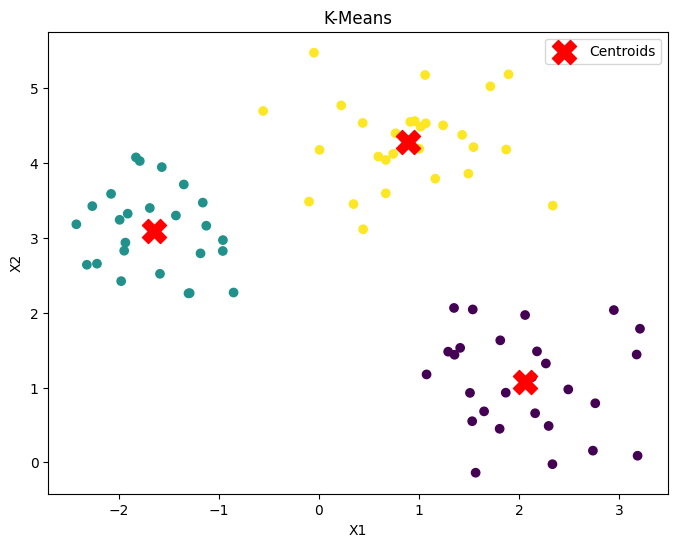

In [50]:
df_kmeans_manual = pd.read_csv("k_means_data.csv")
X_manual = df_kmeans_manual[['# X1', 'X2']].values

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_to_clusters(X, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for i, point in enumerate(X):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(i)
    return clusters

def update_centroids(X, clusters):
    new_centroids = np.array([np.mean(X[cluster_indices], axis=0) if cluster_indices else np.zeros(X.shape[1]) for cluster_indices in clusters])
    return new_centroids

def run_kmeans(X, k, max_iterations=100):
    centroids = initialize_centroids(X, k)
    for iteration in range(max_iterations):
        clusters = assign_to_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters)
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    labels = np.zeros(X.shape[0], dtype=int)
    for cluster_idx, point_indices in enumerate(clusters):
        for point_idx in point_indices:
            labels[point_idx] = cluster_idx
    return labels, centroids

k_manual = 3
cluster_labels_manual, final_centroids_manual = run_kmeans(X_manual, k_manual)

plt.figure(figsize=(8, 6))
plt.scatter(X_manual[:, 0], X_manual[:, 1], c=cluster_labels_manual, cmap='viridis', marker='o')
plt.scatter(final_centroids_manual[:, 0], final_centroids_manual[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [ ]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()

## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [51]:
df_pingwiny = pd.read_csv("penguins.csv")
df_pingwiny

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [52]:
df_pingwiny.dropna(inplace=True)
df_pingwiny

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [53]:
df_pingwiny_ogr = df_pingwiny[['bill_length_mm', 'flipper_length_mm']]

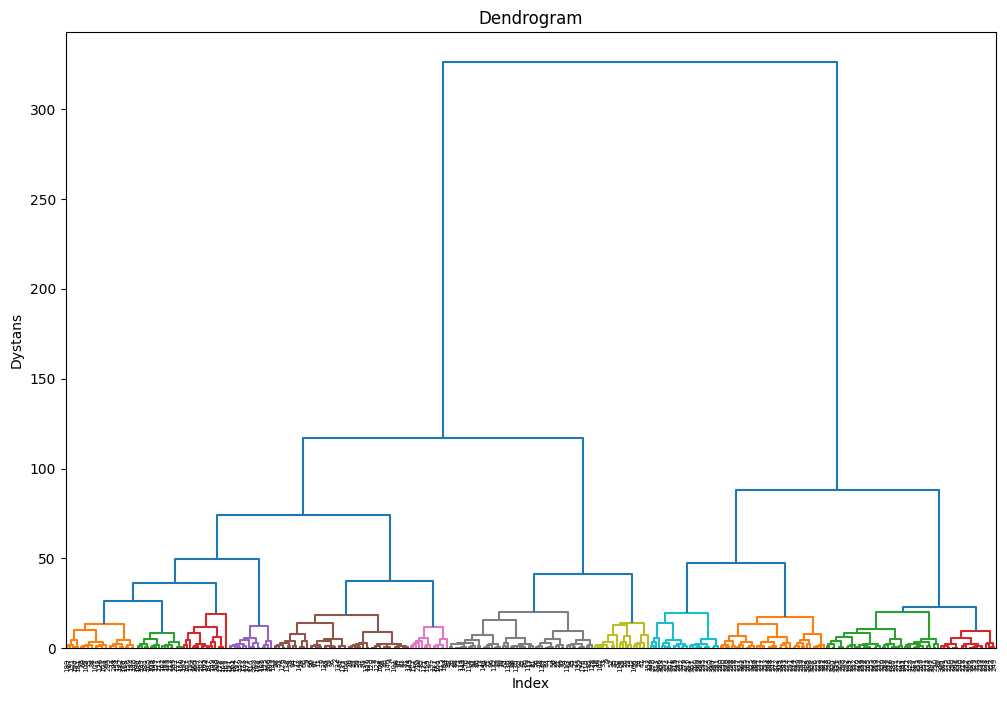

In [56]:
X_pingwiny = df_pingwiny_ogr.values
linked_ward = linkage(X_pingwiny, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(
    linked_ward,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=20
)
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Dystans')
plt.show()

2 - 3 klastry

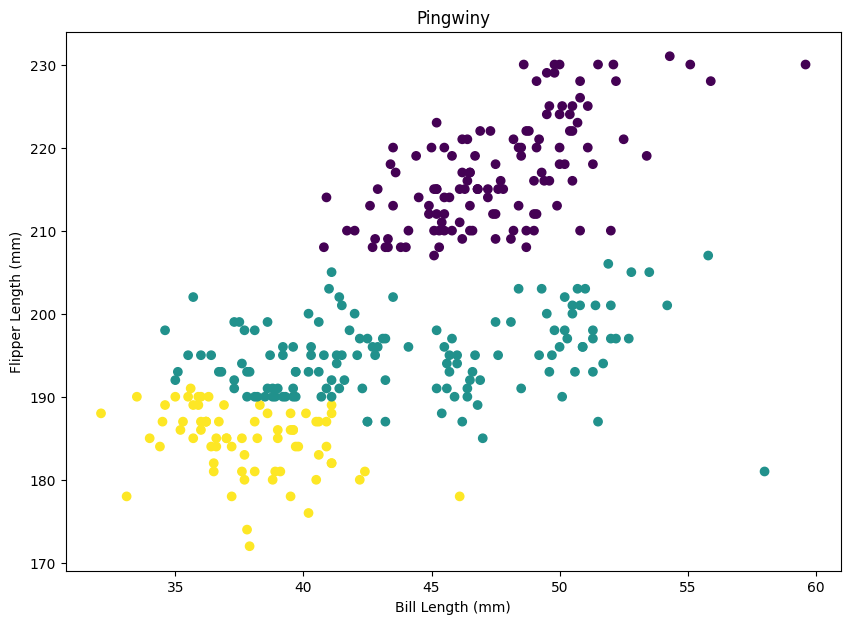

In [60]:
X_pingwiny = df_pingwiny_ogr.values

agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels_hierarchical_penguins = agglomerative.fit_predict(X_pingwiny)

plt.figure(figsize=(10, 7))
plt.scatter(X_pingwiny[:, 0], X_pingwiny[:, 1], c=cluster_labels_hierarchical_penguins, cmap='viridis', marker='o')
plt.title('Pingwiny')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.show()